## Mean / Median imputation - pandas

This example is based on the examples posted on GitHub for [Feature Engineering for Machine Learning Course](https://github.com/solegalli/feature-engineering-for-machine-learning)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# dataset for the demo
from sklearn.datasets import fetch_california_housing

In [17]:
# We'll use the following variables,
# 3 of which contain NA.

cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

- Get the dataset from [House Sale Price Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

In [20]:
# Let's load the House Prices dataset.
df = pd.read_csv("../datasets/houseprice.csv", usecols=cols_to_use)

#data = data.loc[:, cols_to_use]
print(df.shape)
df.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [24]:
# Missing data stats
df.isnull().sum()

LotFrontage    259
OverallQual      0
MasVnrArea       8
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
GarageYrBlt     81
WoodDeckSF       0
SalePrice        0
dtype: int64

In [28]:
# Capture the variables to impute in a list
vars_to_impute = [col for col in df.columns if df[col].isnull().sum() > 0]
vars_to_impute

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

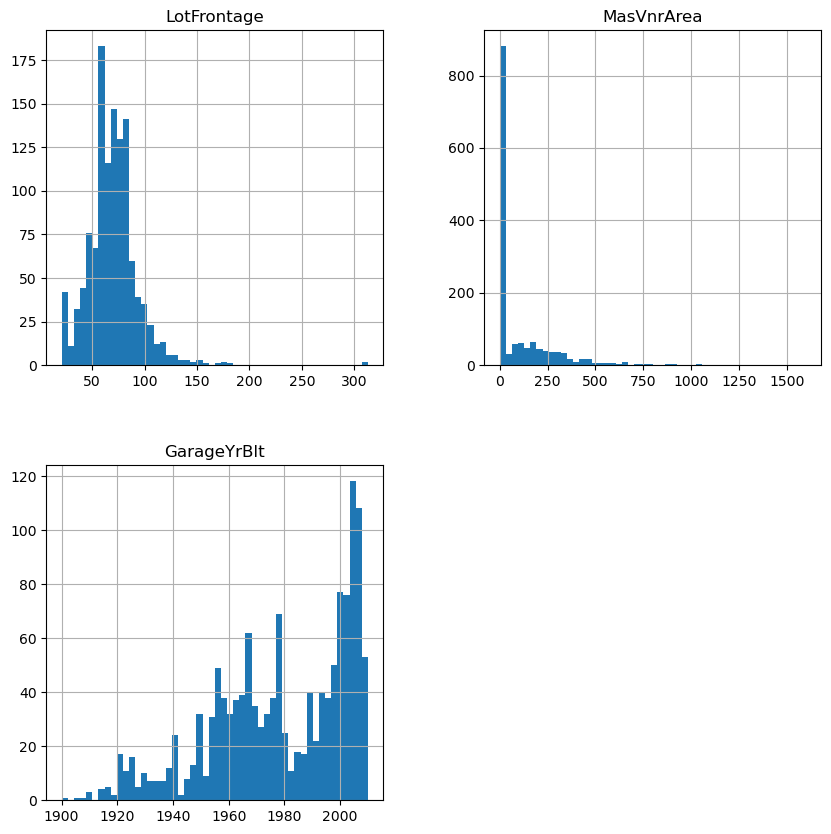

In [30]:
# Let's plot the distributions of the variables to impute
df[vars_to_impute].hist(bins=50, figsize=(10, 10))
plt.show()

In [31]:
# Capture the median of the 3 variables in a dictionary
imputation_dict = df[vars_to_impute].median().to_dict()
imputation_dict

{'LotFrontage': 69.0, 'MasVnrArea': 0.0, 'GarageYrBlt': 1980.0}

To perform mean imputation instead of median, we just replace the previous code by: `imputation_dict = df[vars_to_impute].mean().to_dict()`


In [32]:
# Replace missing data
df.fillna(imputation_dict, inplace=True)

In [33]:
# Corroborate replacement
df.isnull().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
SalePrice      0
dtype: int64

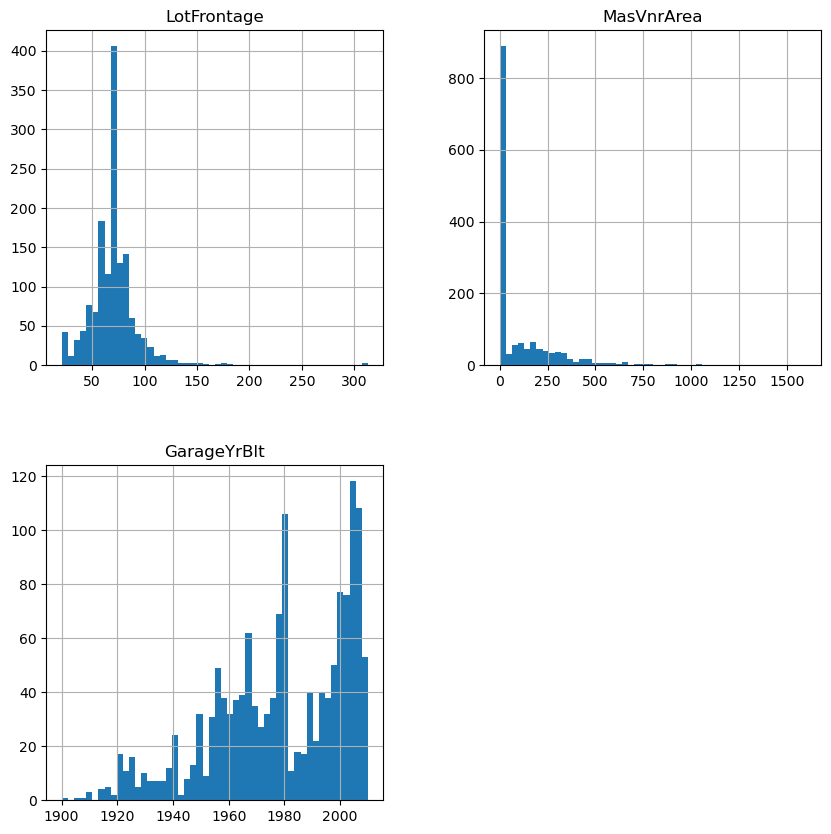

In [34]:
# Let's plot the distributions of the variables after imputation
df[vars_to_impute].hist(bins=50, figsize=(10, 10))
plt.show()